<a href="https://colab.research.google.com/github/mshojaei77/LLMs-Journey/blob/main/ch1/Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understanding Word Embeddings for Text Data

This notebook explores the concept of word embeddings, which are essential for processing raw text in deep neural networks and language models. We’ll go through the theory of word embeddings, discuss why they're necessary, and implement a basic Word2Vec model to generate embeddings.


## 1. Introduction to Word Embeddings

In machine learning, especially deep learning, we need to convert text data into a format that models can process. Words are categorical data, and we need a way to represent them as **continuous numerical vectors**. This transformation process is called embedding.

An *embedding* is a mapping from discrete objects (like words) to points in a continuous vector space, where the distance between vectors indicates semantic similarity. The purpose is to convert text into a numerical format that neural networks can understand.


## 2. Why Neural Networks Need Embeddings

Deep learning models cannot process raw text. Since text data is categorical, it isn’t compatible with the mathematical operations required in neural networks. By converting text into embeddings, we create **dense vector representations** that retain semantic information about the data.

Different types of embeddings:
- **Word embeddings**: Represent individual words.
- **Sentence embeddings**: Represent whole sentences.
- **Paragraph embeddings**: Represent paragraphs or even documents.

For our purposes, we’ll focus on word embeddings, particularly Word2Vec, which learns word representations by predicting word context.


In [ ]:
# Install gensim and matplotlib if not already installed
!pip install gensim matplotlib

In [24]:
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Preparing the Corpus

For demonstration purposes, we'll use the Text8 corpus, which is a popular dataset for training word embeddings.

In [25]:
import os
import requests
import zipfile

# Download the Text8 corpus
dataset_url = 'http://mattmahoney.net/dc/text8.zip'
dataset_path = 'text8.zip'

if not os.path.exists(dataset_path):
    response = requests.get(dataset_url)
    with open(dataset_path, 'wb') as f:
        f.write(response.content)

# Extract the corpus
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall('.')

# Read the corpus
with open('text8', 'r') as file:
    data = file.read()

# Split into sentences (for simplicity, split by 1000 words)
words = data.split()
sentences = [words[i:i+1000] for i in range(0, len(words), 1000)]

# Training the Word2Vec Model

In [26]:
# Initialize and train the model
model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4)

# Save the model for future use
model.save("word2vec.model")

# Exploring the Embeddings


In [27]:
# Load the trained model
model = Word2Vec.load("word2vec.model")

# Find most similar words
similar_words = model.wv.most_similar('science', topn=10)
print("Words similar to 'science':")
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")

Words similar to 'science':
psychology: 0.6781
sociology: 0.6348
humanities: 0.6293
anthropology: 0.6172
sciences: 0.6116
aesthetics: 0.5952
mathematics: 0.5910
astronomy: 0.5868
memetics: 0.5837
engineering: 0.5817


# Selecting Words for Visualization

In [28]:
# Select a list of words to visualize
words_to_visualize = ['science', 'technology', 'engineering', 'mathematics', 'computer', 'data', 'analysis', 'information', 'system', 'learning']

# Get their vectors
word_vectors = [model.wv[word] for word in words_to_visualize]

# Reducing Dimensions with PCA

In [29]:
# Initialize PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Create a DataFrame for plotting
import pandas as pd

df = pd.DataFrame(pca_result, index=words_to_visualize, columns=['PCA1', 'PCA2'])

# Plotting the Embeddings


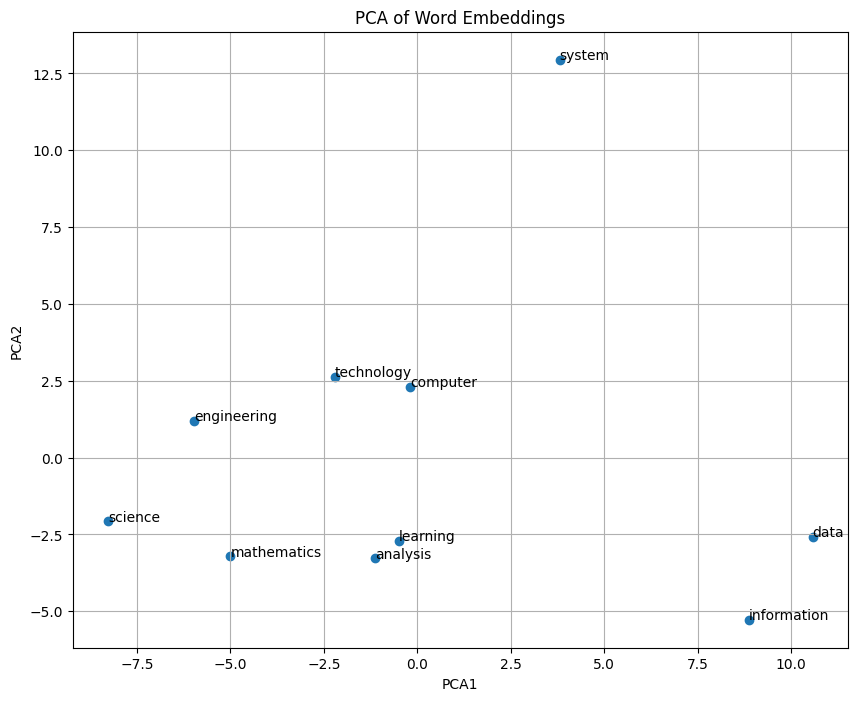

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(df['PCA1'], df['PCA2'])

for word in df.index:
    plt.annotate(word, (df.loc[word, 'PCA1'], df.loc[word, 'PCA2']))

plt.title('PCA of Word Embeddings')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()